![Traffic lights over urban intersection.](traffic.jpg)

**Challenges in Traffic Sign Management**

Traffic signs convey vital information to drivers. However, their effectiveness can be hindered by various factors, such as their visibility under different lighting conditions or the presence of obstructions.


**Training Traffic Sign Detection Models**

To address these challenges and enhance stop sign and traffic light detection capabilities, advanced technologies such as deep learning and computer vision have gained significant attention. In this project, you'll train an object detection model on 6 images of stop signs and 6 images of traffic lights, taken from various angles and lighting conditions. This training teaches the model to classify and locate these signs in images, improving its robustness and reliability for real-world applications.

# Project Instructions
Address the challenges faced in modern transportation systems using Keras.

- Define and train an object detection model to identify traffic signs and lights. Save the training accuracy in a variable named accuracy.
Only run your training loop for 20 epochs due to the small size of the training data.

# How to approach the project
1. Define an object detection model
2. Train the object detection model

## Steps to complete

### 1. Define an object detection model
- You can use `tf.keras.Model` to define a model in tensorflow.
- You can compile the model using `model.compile`.
- You can define the model with 3 modules:
    - The `Feature Extractor` is a 3 layer CNN with dropout in the last layer.
    - The `Model Adaptor` flattens the output from CNN, which is then transformed by a dense layer to prepare for classification.
    - `The Classifier Head` transforms the output from `Model Adaptor` with 2 dense layers to class probabilities.

#### Adding the feature extractor module
- You can use `tf.keras.layers.Conv2D` to define the convolutional layer.
- You can use `tf.keras.layers.AveragePooling2D` to define the pooling layer.
- You can use `tf.keras.layers.Dropout` to define the dropout layer.

#### Adding the model adaptor module
- You can use `tf.keras.layers.Flatten` to flatten the input to prepare for input into the dense layer.
- You can use `tf.keras.layers.Dense` to define the dense layer.
- You can use 64 as the number of outputs for the Dense layer.

#### Adding the classifier head module
- You can use `tf.keras.layers.Dense` to define the dense layer.
- You can use `softmax` activation to convert arbitrary real-valued scores to class probabilities in the second dense layer.
- You can use the number of classes as the number of outputs for the second dense layer.

### 2. Train the object detection model
- You can use `model.fit` to train the model.
- You can save the output of `model.fit` as `history` to retrieve training metrics, such as accuracy.

#### Get the training accuracy from history
- You can inspect the history object and retrieve `accuracy` from it.

In [136]:
'''
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load preprocessed images and the corresponding labels
image, labels = np.load('batch.npy',allow_pickle=True).tolist()

# hyperparameters
input_size = image.shape[1] # dimension of input image
num_classes = labels['classifier_head'].shape[1] # number of classes
DROPOUT_FACTOR = 0.2 # dropout probability

# visualize one example preprocessed image
plt.imshow(image[2])
plt.axis("off")
'''

'\n#\xa0Import required libraries\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom tensorflow import keras\n\n# Load preprocessed images and the corresponding labels\nimage, labels = np.load(\'batch.npy\',allow_pickle=True).tolist()\n\n# hyperparameters\ninput_size = image.shape[1] # dimension of input image\nnum_classes = labels[\'classifier_head\'].shape[1] # number of classes\nDROPOUT_FACTOR = 0.2 # dropout probability\n\n# visualize one example preprocessed image\nplt.imshow(image[2])\nplt.axis("off")\n'

In [137]:
# Start coding here
# Use as many cells as you need
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [138]:
# Load a preprocessed images and the corresponding labels
image, labels = np.load('batch.npy',allow_pickle=True).tolist()

In [139]:
# Check the Data Structure: 
# It's a good idea to print out the structure or type of image and labels to understand how they're organized:
print(type(image))  # Should be list or array
print("Number of images: ",len(image))   # Number of images
print(type(labels)) # Should be list or array
print("Number of labels: ",len(labels))  # Number of labels

<class 'numpy.ndarray'>
Number of images:  12
<class 'dict'>
Number of labels:  2


In [140]:
#  Check the Type of labels
# First, check the type of labels to confirm whether it's a list, dictionary, or something else:
print(type(labels))

<class 'dict'>


In [141]:
# If labels is a Dictionary:
# The keys might not be simple integers. Print out the keys to understand how to access the labels:
print(labels.keys())

dict_keys(['classifier_head', 'regressor_head'])


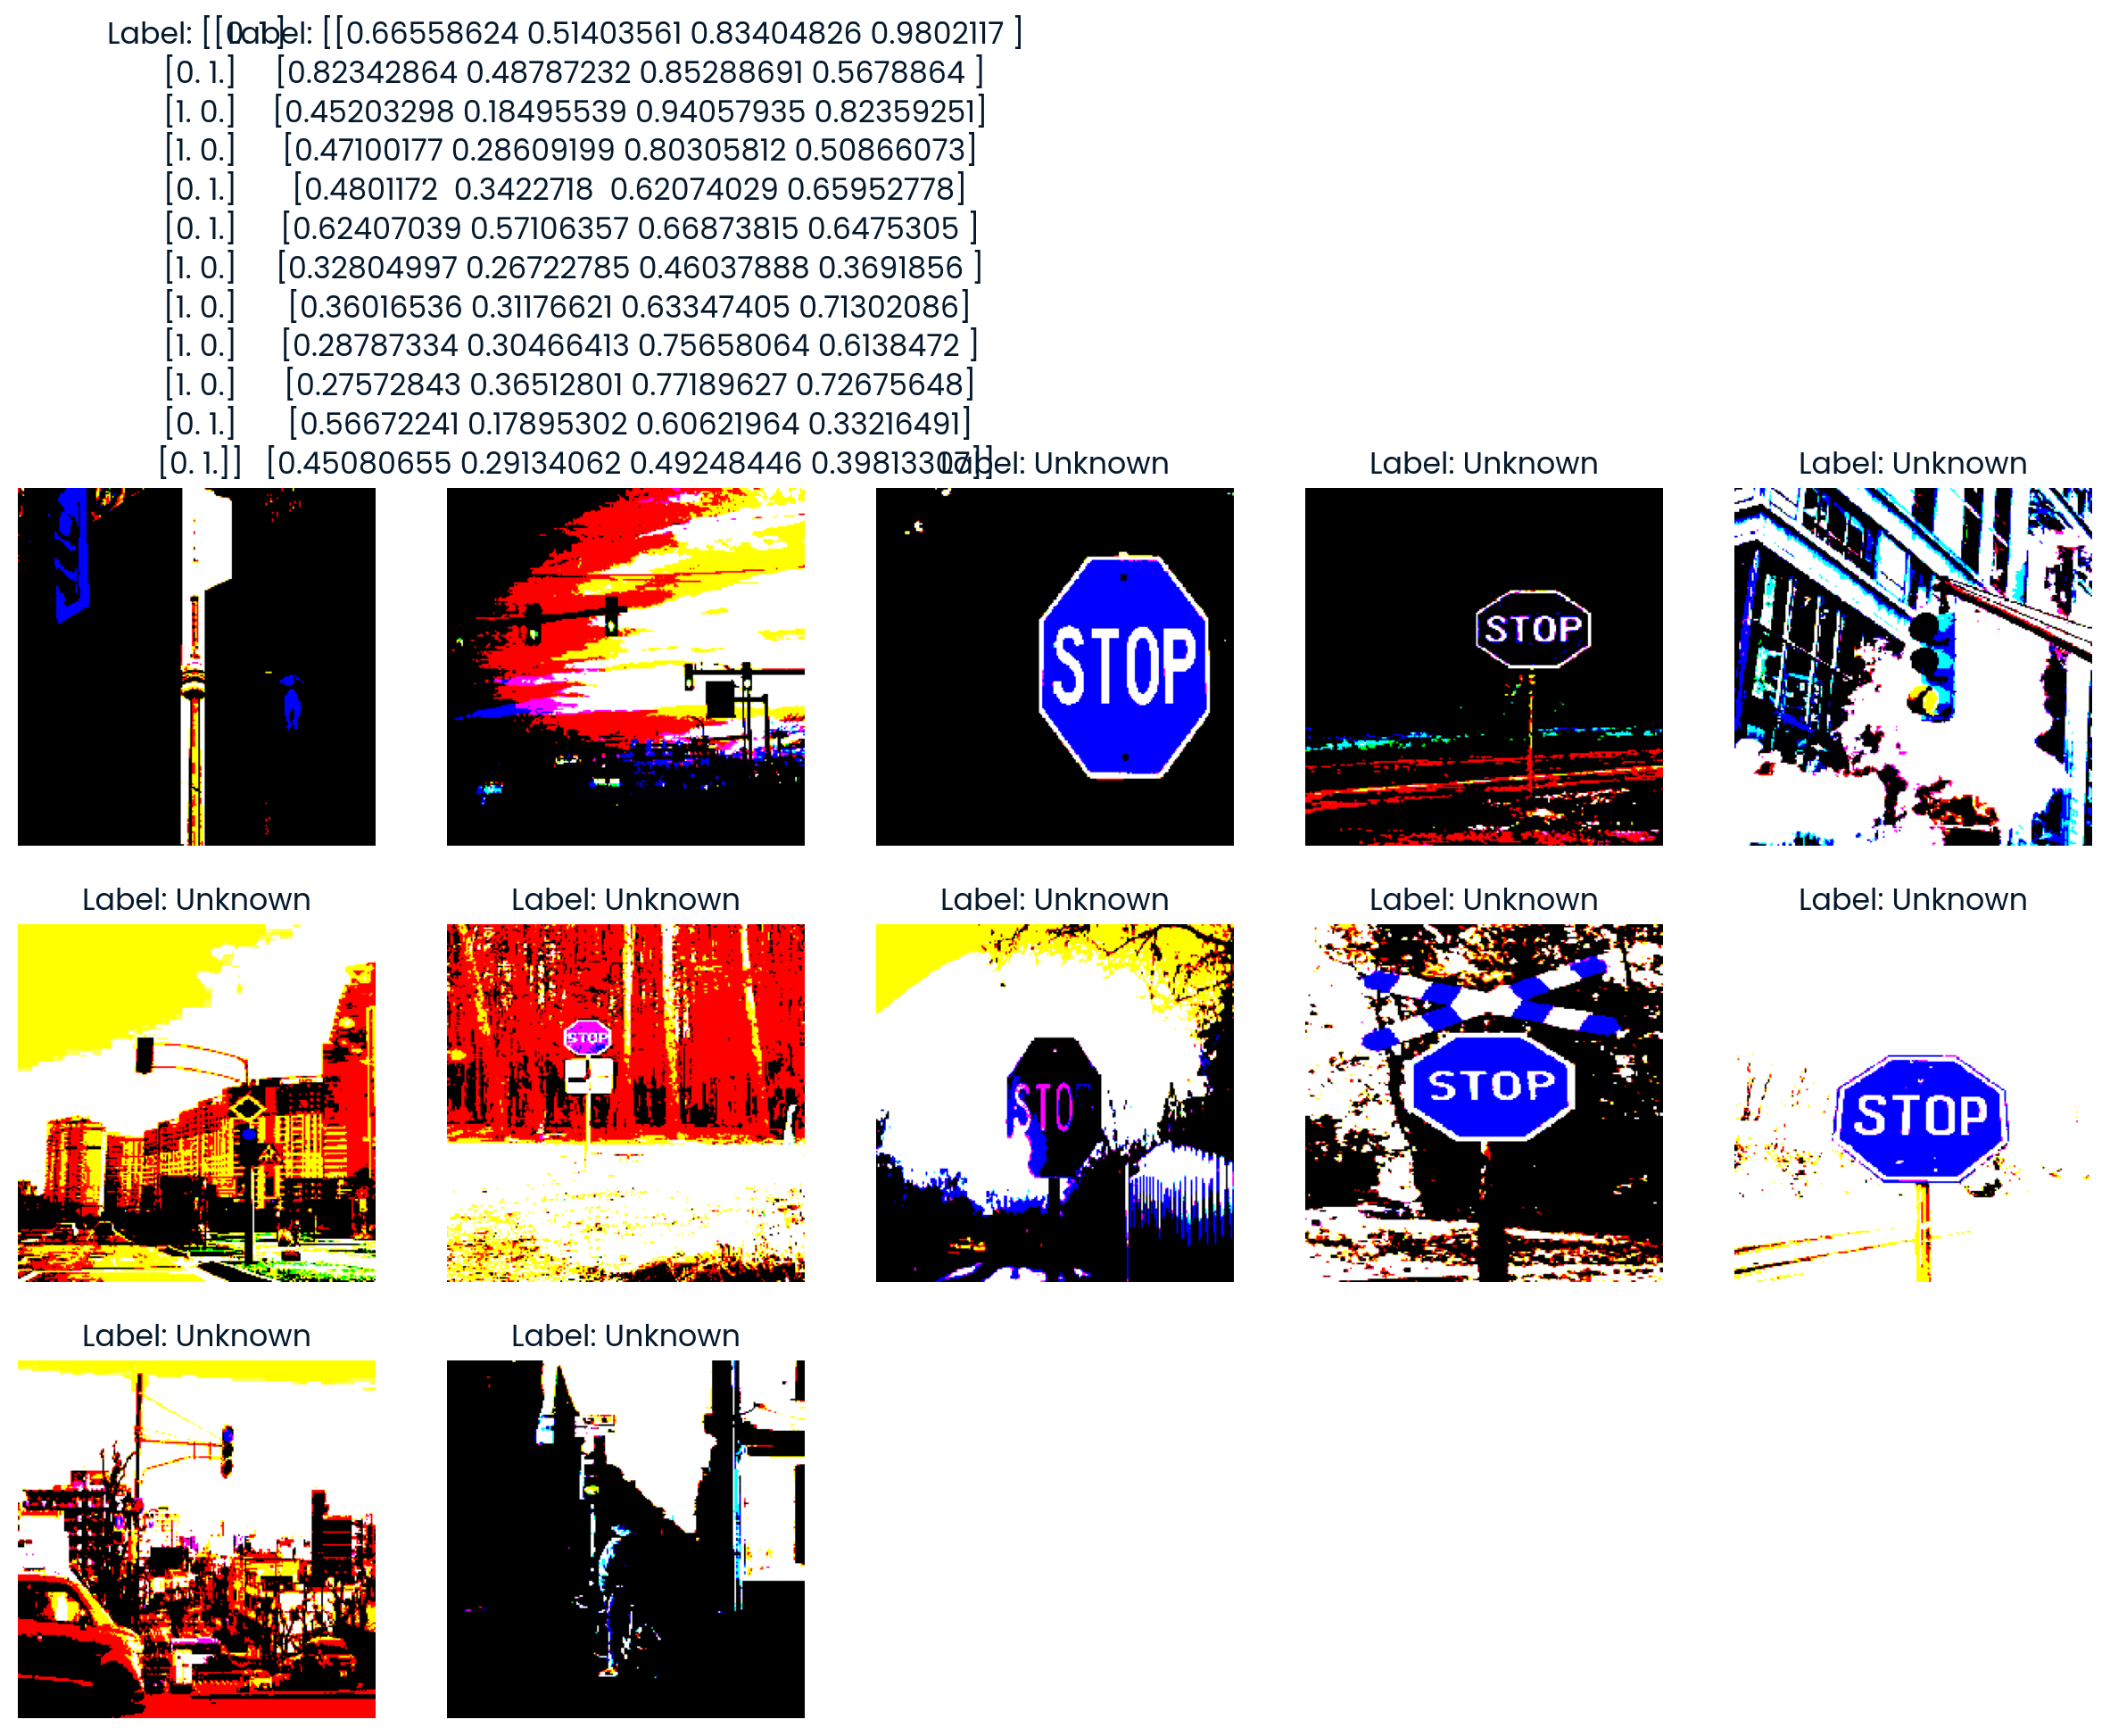

In [142]:
# Display All Images in One Figure
def display_all_images(images, labels, num_display=5):
    num_images = len(images)
    cols = num_display
    rows = (num_images + cols - 1) // cols  # Calculate number of rows needed
    plt.figure(figsize=(15, rows * 3))
    
    # Check if labels is a dictionary or list
    if isinstance(labels, dict):
        keys = list(labels.keys())
    else:
        keys = range(len(labels))
    
    # Display images
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        
        # Access label safely
        try:
            if isinstance(labels, dict):
                label = labels[keys[i]]
            else:
                label = labels[i]
        except IndexError:
            label = "Unknown"
        plt.title(f"Label: {label}")
        plt.axis('off')
    
    plt.show()

# Example usage
display_all_images(image, labels, num_display=5)

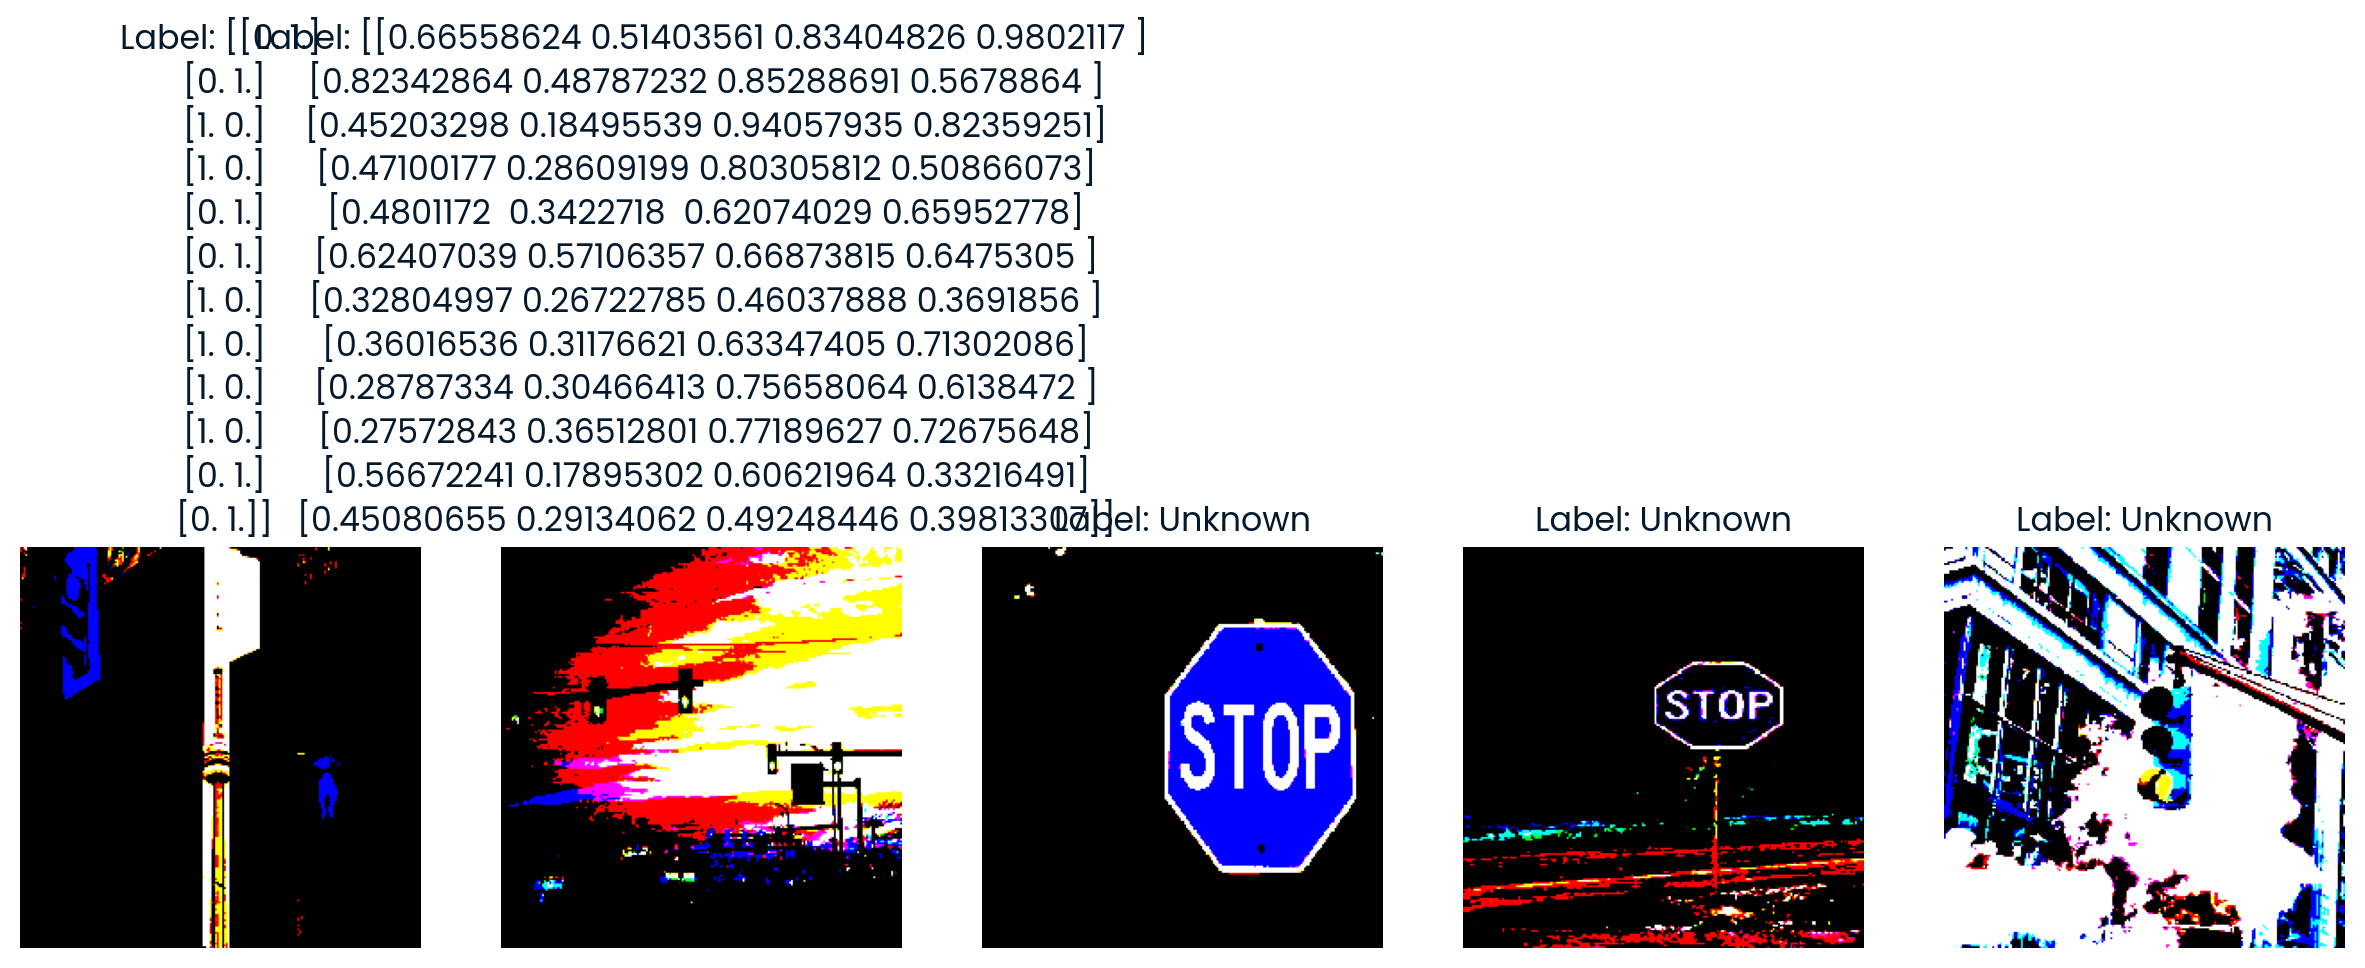

In [143]:
# Determine the number of images to display
num_images = min(5, len(image))  # Display up to 5 images, or less if fewer images exist
plt.figure(figsize=(15, 5))  # Adjust the size of the grid

# Check if labels is a dictionary or list
if isinstance(labels, dict):
    keys = list(labels.keys())  # Extract keys if labels is a dictionary
else:
    keys = range(len(labels))  # If labels is a list, use indices as keys

# Display images
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image[i], cmap='gray')  # Use cmap='gray' for grayscale images if needed
    
    # Access label safely
    try:
        label = labels[keys[i]]  # Use keys[i] for dicts or direct index for lists
    except IndexError:
        label = "Unknown"  # Fallback in case of index mismatch
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.show()

In [144]:
# hyperparameters
input_size = image.shape[1] # dimension of input image
num_classes = labels['classifier_head'].shape[1] # number of classes
DROPOUT_FACTOR = 0.2 # dropout probability

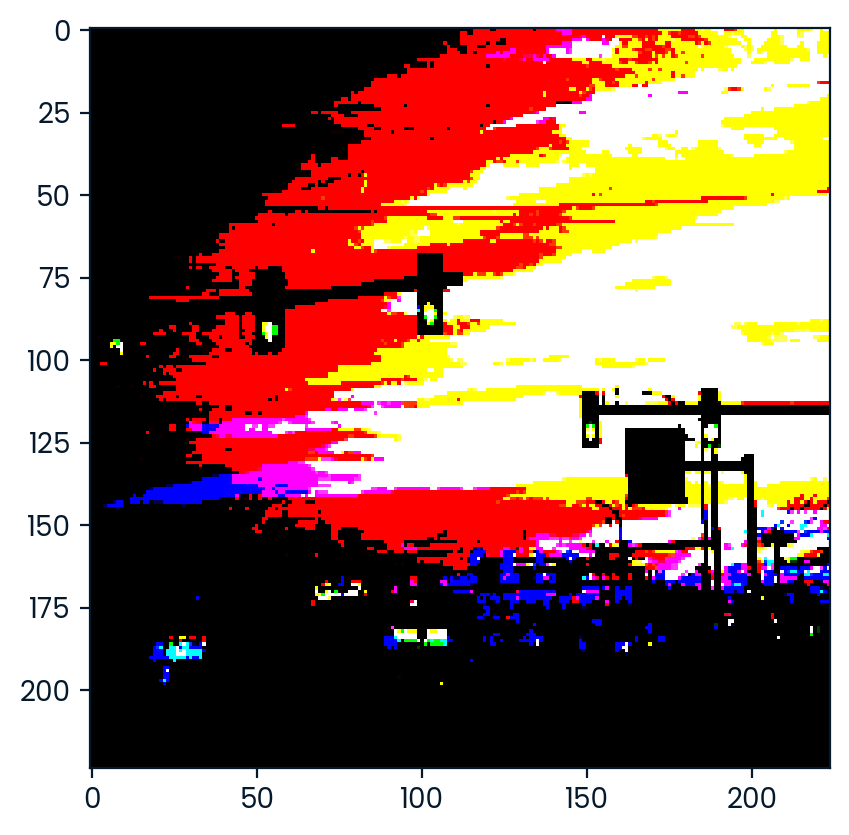

In [145]:
# visualize one example preprocessed image
plt.imshow(image[1])

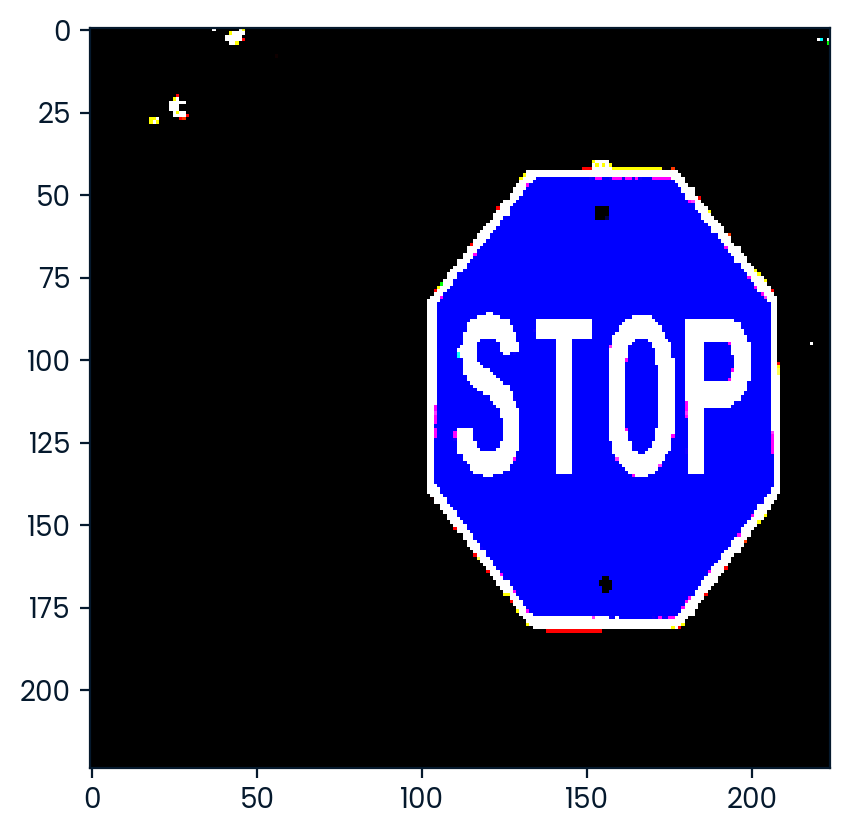

In [146]:
# visualize one example preprocessed image
plt.imshow(image[2])

In [147]:
# Create a sequential model - a linear stack of layers
model = keras.Sequential()

In [148]:
# Feature extractor: This part of the model extracts features from the input images
# Convolutional layer with 16 filters, each filter with a size of 3x3, using ReLU activation function
# Input shape is the size of the input image: (input_size, input_size, 3) - 3 channels for RGB images
model.add(keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(input_size, input_size, 3)))
# Average pooling layer to reduce spatial dimensions by taking the average value in each 2x2 patch
model.add(keras.layers.AveragePooling2D(2, 2))
# Add another convolutional layer with 32 filters and ReLU activation
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
# Another average pooling layer
model.add(keras.layers.AveragePooling2D(2, 2))
# Add one more convolutional layer with 64 filters and ReLU activation
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
# Dropout layer to prevent overfitting by randomly dropping a fraction of the units during training
model.add(keras.layers.Dropout(DROPOUT_FACTOR))
# Another average pooling layer
model.add(keras.layers.AveragePooling2D(2, 2))

In [149]:
# Model adaptor: This part of the model adapts the extracted features for classification
# Flatten layer to convert the 3D feature maps into a 1D feature vector
model.add(keras.layers.Flatten())
# Dense (fully connected) layer with 64 neurons and ReLU activation
model.add(keras.layers.Dense(64, activation='relu'))

In [150]:
# Classifier head: This part of the model performs the actual classification
# Dense layer with 64 neurons and ReLU activation
model.add(keras.layers.Dense(64, activation='relu'))
# Output layer with 'num_classes' neurons and softmax activation, representing class probabilities
model.add(keras.layers.Dense(num_classes, activation='softmax', name='classifier_head'))

In [151]:
# Compile the model: Define optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [152]:
# Train the model using the data generator
# 'image' contains the input images, 'labels' contains corresponding labels
# Epochs determine how many times the entire dataset is passed forward and backward through the network
history = model.fit(image, labels['classifier_head'], epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 769ms/step - loss: 3.0828 - accuracy: 0.4167
Epoch 2/20
1/1 [==============================] - 0s 400ms/step - loss: 110.3728 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 395ms/step - loss: 7.5520 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 396ms/step - loss: 0.4682 - accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 0s 401ms/step - loss: 0.0438 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 403ms/step - loss: 0.9186 - accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 0s 400ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 400ms/step - loss: 1.6307e-04 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 414ms/step - loss: 1.4871e-05 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 384ms/step - loss: 1.0639e-05 - accuracy: 1.0000
Epoch

In [153]:
# Print the training accuracy
accuracy = history.history['accuracy'][-1]
print(f"Training accuracy: {accuracy}")

Training accuracy: 1.0
